# Waste Image Classification

There must be domestic waste every day from every house. One thing we can deal with that and not pollute our environment is to take care of it in the right ways. One thing to help this is to separate our waste into correct types. But not seldom, we get confused on deciding what types of waste do we have. This supervised Machine Learning model is the start to solve the problem by classifying what waste we have by using images we capture. In this model, we have 45 different types of waste there are:

`"safe_head", "erecient", "poli_cup", "rubberband", "dirty_bag","potato_bag", "plastick_red", "paper_bento", "paper_cup", "plastic_cup","pizzabox", "plastic_spoon", "medicalmask", "porcelain", "potato_can","zip_bag", "easy_raincoat", "comb", "shampoo_bottle", "paper_bag","yakult", "charging_cable", "thin_plastic_box", "pen", "plastic_egg_carton", "flayer", "facial_cleanser", "net_bag", "doll", "poted_plan", "diapers", "water_filter", "wooden_product", "plastic_bento", "toilet_brush", "yoga_mat", "disposable_chopstick", "butter", "fruit_net", "milk_carton", "bubble_wrap", "mirror", "phone_case", "earphone", "shredded_paper".`

## Import Libraries

In [ ]:
import random
import os
from pathlib import Path
from collections import Counter

import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

import joblib

## Dataset

We get the dataset from [Kaggel](https://www.kaggle.com/raijincheng/rethink-recycle-dataset). it consist 45 folders of different types of waste, with almost 8.000 different images. The 101 categoreis is based on [this catalogue](https://recycle.rethinktw.org/catalogue/).

First we need to load images using `CV2` and `os.walk` library. And then we want to know the order of images being loaded and how many images in that categories.

In [ ]:
path = "data/waste_image"

images = []
num_file = []
for root, _, files in os.walk(path):
    current_directory_path = os.path.abspath(root)
    print(current_directory_path)
    total_files = 0
    for f in files:
        name, ext = os.path.splitext(f)
        if ext == ".jpg":
            current_image_path = os.path.join(current_directory_path, f)
            current_image = cv2.imread(current_image_path)
            current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB)
            images.append(current_image)
        if ext == ".png":
            current_image_path = os.path.join(current_directory_path, f)
            current_image = cv2.imread(current_image_path)
            current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB)
            images.append(current_image)
        if ext == ".jpeg":
            current_image_path = os.path.join(current_directory_path, f)
            current_image = cv2.imread(current_image_path)
            current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB)
            images.append(current_image)
        total_files += 1
    num_file.append(total_files)
    print("numbers of images for this folder:", total_files)
    print()
    print("index files from next folder start from", len(images))               

/content/drive/MyDrive/Colab Notebooks/data/waste_image
numbers of images for this folder: 0

index files from next folder start from 0
/content/drive/MyDrive/Colab Notebooks/data/waste_image/03_safe_head
numbers of images for this folder: 298

index files from next folder start from 298
/content/drive/MyDrive/Colab Notebooks/data/waste_image/08_erecient
numbers of images for this folder: 95

index files from next folder start from 393
/content/drive/MyDrive/Colab Notebooks/data/waste_image/06_poli_cup
numbers of images for this folder: 120

index files from next folder start from 513
/content/drive/MyDrive/Colab Notebooks/data/waste_image/10_rubberband
numbers of images for this folder: 149

index files from next folder start from 662
/content/drive/MyDrive/Colab Notebooks/data/waste_image/02_dirty_bag
numbers of images for this folder: 72

index files from next folder start from 734
/content/drive/MyDrive/Colab Notebooks/data/waste_image/09_potato_bag
numbers of images for this folde

## Exploratory Data Analysis


We want to know numbers of image for each folder/categories

In [ ]:
num_file

[0,
 298,
 95,
 120,
 149,
 72,
 190,
 49,
 180,
 282,
 451,
 118,
 302,
 151,
 706,
 323,
 34,
 271,
 236,
 281,
 252,
 215,
 167,
 14,
 316,
 66,
 75,
 247,
 188,
 304,
 389,
 29,
 210,
 120,
 85,
 96,
 114,
 47,
 68,
 100,
 144,
 54,
 58,
 158,
 123,
 14]

In [ ]:
num_file.pop(0)
num_file

[298,
 95,
 120,
 149,
 72,
 190,
 49,
 180,
 282,
 451,
 118,
 302,
 151,
 706,
 323,
 34,
 271,
 236,
 281,
 252,
 215,
 167,
 14,
 316,
 66,
 75,
 247,
 188,
 304,
 389,
 29,
 210,
 120,
 85,
 96,
 114,
 47,
 68,
 100,
 144,
 54,
 58,
 158,
 123,
 14]

In [ ]:
len(num_file)

45

Then we create labels based on the order of folder loaded before. We have 45 different waste types.

In [ ]:
labels = ["safe_head", "erecient", "poli_cup", "rubberband", "dirty_bag",
          "potato_bag", "plastick_red", "paper_bento", "paper_cup", "plastic_cup",
          "pizzabox", "plastic_spoon", "medicalmask", "porcelain", "potato_can",
          "zip_bag", "easy_raincoat", "comb", "shampoo_bottle", "paper_bag",
          "yakult", "charging_cable", "thin_plastic_box", "pen", "plastic_egg_carton",
          "flayer", "facial_cleanser", "net_bag", "doll", "poted_plan",
          "diapers", "water_filter", "wooden_product", "plastic_bento", "toilet_brush",
          "yoga_mat", "disposable_chopstick", "butter", "fruit_net", "milk_carton",
          "bubble_wrap", "mirror", "phone_case", "earphone", "shredded_paper",]

Let's load the sample image to make sure.

image height: 652
image width: 284


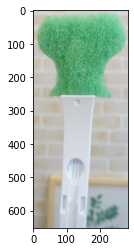

In [ ]:
idx = 7000
print("image height:", images[idx].shape[0])
print("image width:", images[idx].shape[1])
plt.imshow(images[idx])
plt.show()

image height: 207
image width: 108


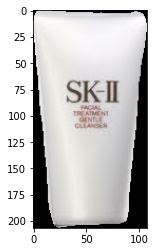

In [ ]:
idx = 5555
print("image height:", images[idx].shape[0])
print("image width:", images[idx].shape[1])
plt.imshow(images[idx])
plt.show()

Then we want to now about the statistics of images height and images width. Because we want to do some image resizing to reduce the usage of memory.

In [ ]:
img_height = [img.shape[0] for img in images]
img_width = [img.shape[1] for img in images]

In [ ]:
print("height stats:", "np.max(img_height) =", np.max(img_height), "...", "\n"
      "np.min(img_height) = ", np.min(img_height), "...", "np.mean(img_height) = ", np.mean(img_height), "...", "\n"
      "np.median(img_height) =", np.median(img_height))
print("width stats:", "np.max(img_width) =", np.max(img_width), "...", "\n"
      "np.min(img_width) = ", np.min(img_width), "...", "np.mean(img_width) = ", np.mean(img_width), "...", "\n"
      "np.median(img_width) =", np.median(img_width))

height stats: np.max(img_height) = 4486 ... 
np.min(img_height) =  20 ... np.mean(img_height) =  377.0832914572864 ... 
np.median(img_height) = 302.0
width stats: np.max(img_width) = 6000 ... 
np.min(img_width) =  14 ... np.mean(img_width) =  321.1507537688442 ... 
np.median(img_width) = 228.0


We have very diverse shape og images. Let's reshape to make it easier for modelling too.

In [ ]:
image_dim = (100, 150)
resized = []
for image in images:
    resized.append(cv2.resize(image, image_dim))

image height: 150
image width: 100


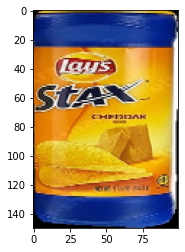

In [ ]:
idx = 3333
print("image height:", resized[idx].shape[0])
print("image width:", resized[idx].shape[1])
plt.imshow(resized[idx])
plt.show()

image height: 150
image width: 100


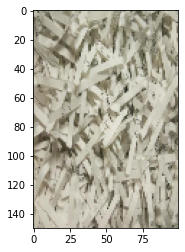

In [ ]:
idx = 7959
print("image height:", resized[idx].shape[0])
print("image width:", resized[idx].shape[1])
plt.imshow(resized[idx])
plt.show()

In [ ]:
resized_height = [img.shape[0] for img in resized]
resized_width = [img.shape[1] for img in resized]

In [ ]:
print("height stats:", "np.max(img_height) =", np.max(resized_height), "...", "\n"
      "np.min(img_height) = ", np.min(resized_height), "...", "np.mean(img_height) = ", np.mean(resized_height), "...", "\n"
      "np.median(img_height) =", np.median(resized_height))
print("width stats:", "np.max(img_width) =", np.max(resized_width), "...", "\n"
      "np.min(img_width) = ", np.min(resized_width), "...", "np.mean(img_width) = ", np.mean(resized_width), "...", "\n"
      "np.median(img_width) =", np.median(resized_width))

height stats: np.max(img_height) = 150 ... 
np.min(img_height) =  150 ... np.mean(img_height) =  150.0 ... 
np.median(img_height) = 150.0
width stats: np.max(img_width) = 100 ... 
np.min(img_width) =  100 ... np.mean(img_width) =  100.0 ... 
np.median(img_width) = 100.0


We want to know the distribution of images for 45 types.

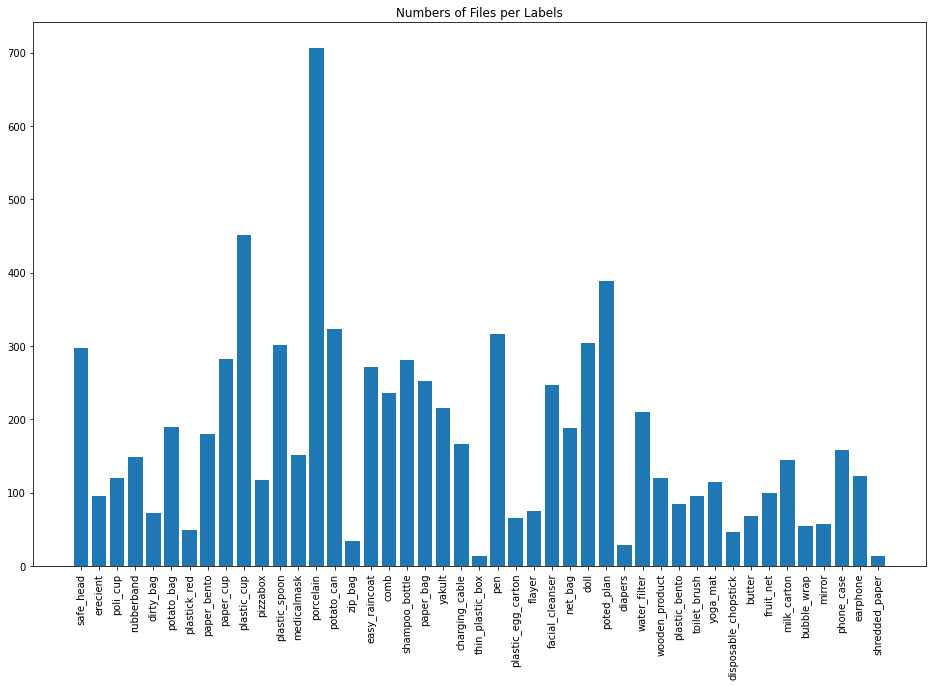

In [ ]:
plt.figure(figsize=(16, 10))
plt.bar(np.arange(len(labels)), num_file)
plt.title("Numbers of Files per Labels")
plt.xticks(np.arange(len(labels)), labels=labels, rotation=90)
plt.show()

The images not distribute evenly. So maybe it will affect the evaluation score and accuracy of the model.

## Data Preparation


Before we do the modelling, we need to prepare our data. First we need to define features and target for modelling. For the target, we will make a list of the categories waste name then multiple by numbers of images for each categories.

In [ ]:
target = []
for a, b in zip(num_file, labels):
  target += ([b] * a)

In [ ]:
target.pop(1434)

'paper_cup'

In [ ]:
len(target)

7960

In [ ]:
len(images)

7960

image height: 150
image width: 100
plastic_cup


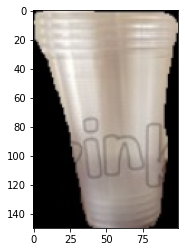

In [ ]:
idx = 1434
print("image height:", resized[idx].shape[0])
print("image width:", resized[idx].shape[1])
print(target[idx])
plt.imshow(resized[idx])
plt.show()

image height: 150
image width: 100
toilet_brush


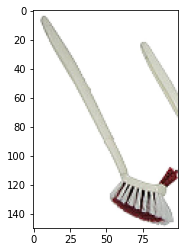

In [ ]:
idx = 7009
print("image height:", resized[idx].shape[0])
print("image width:", resized[idx].shape[1])
print(target[idx])
plt.imshow(resized[idx])
plt.show()

For the features, we will make the images to Grayscale color using `CV2.COLOR_RGB2GRAY` to reduce the dimension. After that we flatten the dimension to make it easier for modelling and save some memory space. From `100 x 150` become `15000`.

In [ ]:
features = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in resized])

In [ ]:
features.shape

(7960, 150, 100)

In [ ]:
features = features.reshape((features.shape[0], -1))
print("New shape of features", features.shape)

New shape of features (7960, 15000)


Then we split the data for training and test.

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(
    features, target,
    test_size=.1,
    stratify=target,
    random_state=11
)

print("len(X_train)", len(X_train), "\n",
      "len(X_dev)", len(X_dev))

len(X_train) 7164 
 len(X_dev) 796


To save more times, we will use `PCA` to reduce the dimension features. Before we do `PCA` we need to normalize the data first using `StandardScaler()`.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
def run_pca(data, n_components=None):
    pca = PCA(n_components, random_state=11)
    pc_data = pca.fit_transform(data)
    return pca, pc_data


def scree_plot(pca, annotate=True):
    n_components = len(pca.explained_variance_ratio_)
    var_ratio = pca.explained_variance_ratio_.round(2)
    var_ratio_cumsum = var_ratio.cumsum()

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.bar(range(n_components), var_ratio)
    ax.plot(range(n_components), var_ratio_cumsum, marker=".")
    if annotate:
        for component in range(n_components):
            ax.annotate(f"{var_ratio[component]*100}%", (component, var_ratio[component]), va="bottom", ha="center", fontsize=10)
        ax.yaxis.set_tick_params(width=0)
        ax.xaxis.set_tick_params(width=2, length=5)
    ax.set_xlabel("Principal Components")
    ax.set_ylabel("Variance Explained (%)")
    ax.set_title("Explained Variance per Components")
    plt.show()

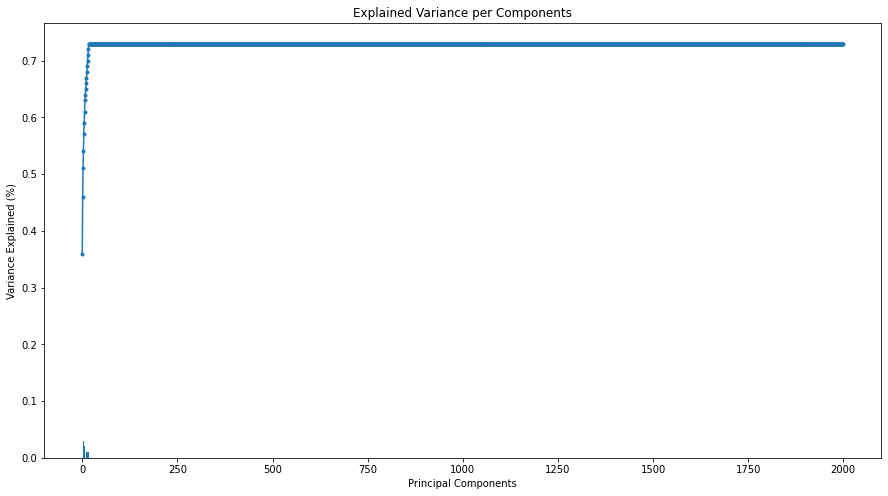

In [ ]:
pca, pc_data = run_pca(X_train, n_components=2000)
scree_plot(pca, annotate=False)

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.3631901 , 0.4614317 , 0.51499273, ..., 0.98079912, 0.98081141,
       0.98082368])

with only 2000 features we already got 98.08% data information (15000)

In [ ]:
scaled_X_test = scaler.transform(X_dev)
pc_test = pca.transform(scaled_X_test)

## Modelling

For the modelling, we will try using `SVC()`, `RandomForrest()`, and `LGBMClassifier()`. And for the evaluation metrics we use `classification_report()`

### SVC()
First we will use SVC()

In [ ]:
# define estimator
svc = SVC()

# model training
svc.fit(pc_data, y_train)

# prediction
svc_pred_train = svc.predict(pc_data)
svc_pred_dev = svc.predict(pc_test)

# classification reports
print(
    "Performance on training set:",
    classification_report(y_train, svc_pred_train),
    sep="\n"
)
print(
    "Performance on development set:",
    classification_report(y_dev, svc_pred_dev),
    sep="\n"
)

Performance on training set:
                      precision    recall  f1-score   support

         bubble_wrap       0.00      0.00      0.00        49
              butter       1.00      0.20      0.33        61
      charging_cable       0.42      0.53      0.47       150
                comb       0.76      0.65      0.70       212
             diapers       0.00      0.00      0.00        26
           dirty_bag       0.00      0.00      0.00        65
disposable_chopstick       1.00      0.02      0.05        42
                doll       0.70      0.66      0.68       274
            earphone       0.92      0.65      0.76       111
       easy_raincoat       0.60      0.60      0.60       244
            erecient       0.98      0.59      0.74        86
     facial_cleanser       0.90      0.67      0.77       222
              flayer       0.97      0.54      0.69        67
           fruit_net       0.28      0.06      0.09        90
         medicalmask       0.75      0.4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

we got a very bad accuracy for the SVC() with only 60% on train data, and 41% on test data. Next we will try to do hyperparameter tunning using `GridSearchCV()`. We will tune the `gamma, C, and degree`.

In [ ]:
# gamma = (.01, .001, .0001)
# C = (.1, 1)
# degrees = (4, 5, 6)


# grid_search = GridSearchCV(
#     SVC(kernel="poly"),
#     param_grid={
#         "gamma": gamma,
#         "C": C,
#         "degree": degrees,
#     }
# )


# grid_search.fit(pc_data, y_train)

In [ ]:
# grid_search.best_params_

In [ ]:
# define estimator
svc = SVC(C=1, degree=4, gamma=.0001)

# model training
svc.fit(pc_data, y_train)

# prediction
svc_pred_train = svc.predict(pc_data)
svc_pred_dev = svc.predict(pc_test)

# classification reports
print(
    "Performance on training set:",
    classification_report(y_train, svc_pred_train),
    sep="\n"
)
print(
    "Performance on development set:",
    classification_report(y_dev, svc_pred_dev),
    sep="\n"
)

Performance on training set:
                      precision    recall  f1-score   support

         bubble_wrap       0.67      0.16      0.26        49
              butter       1.00      0.21      0.35        61
      charging_cable       0.51      0.66      0.58       150
                comb       0.83      0.74      0.78       212
             diapers       1.00      0.08      0.14        26
           dirty_bag       1.00      0.09      0.17        65
disposable_chopstick       1.00      0.02      0.05        42
                doll       0.83      0.77      0.80       274
            earphone       1.00      0.70      0.83       111
       easy_raincoat       0.73      0.76      0.75       244
            erecient       1.00      0.78      0.88        86
     facial_cleanser       0.96      0.79      0.87       222
              flayer       0.98      0.75      0.85        67
           fruit_net       0.35      0.20      0.25        90
         medicalmask       0.81      0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

by using parameters `'C': 1, 'degree': 4, 'gamma': 0.0001`, we can increase the accuracy fot train data to 69%, and test data to 44%. Still bad but better.

### Random Forrest

Next we will use `RandomForestClassifier()`

In [ ]:
# define estimator
rf = RandomForestClassifier()

# model training
rf.fit(pc_data, y_train)

# prediction
rf_pred_train = rf.predict(pc_data)
rf_pred_dev = rf.predict(pc_test)

# classification reports
print(
    "Performance on training set:",
    classification_report(y_train, rf_pred_train),
    sep="\n"
)
print(
    "Performance on development set:",
    classification_report(y_dev, rf_pred_dev),
    sep="\n"
)

Performance on training set:
                      precision    recall  f1-score   support

         bubble_wrap       1.00      1.00      1.00        49
              butter       1.00      1.00      1.00        61
      charging_cable       1.00      1.00      1.00       150
                comb       1.00      1.00      1.00       212
             diapers       1.00      1.00      1.00        26
           dirty_bag       1.00      1.00      1.00        65
disposable_chopstick       1.00      1.00      1.00        42
                doll       1.00      1.00      1.00       274
            earphone       1.00      1.00      1.00       111
       easy_raincoat       1.00      1.00      1.00       244
            erecient       1.00      1.00      1.00        86
     facial_cleanser       1.00      1.00      1.00       222
              flayer       1.00      1.00      1.00        67
           fruit_net       1.00      1.00      1.00        90
         medicalmask       1.00      1.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For the data train, we got 100% accuracy, but worst we got only 22% on data test. It's very overfit. Let's try to adjust and do hyperparameter tunning. We'll try to tune `max_depth, min_sample_split, and min_sample_leaf`.

In [ ]:
# max_depth = (None, 100, 200)
# min_sample_split = (2, 20, 40)
# min_sample_leaf = (1, 10, 20)


# grid_search = GridSearchCV(
#     rf,
#     param_grid={
#         "max_depth": max_depth,
#         "min_samples_split": min_sample_split,
#         "min_samples_leaf": min_sample_leaf,
#     }
# )


# grid_search.fit(pc_data, y_train)

In [ ]:
# grid_search.best_params_

In [ ]:
# define estimator
rf = RandomForestClassifier(min_samples_split=20, min_samples_leaf=1)

# model training
rf.fit(pc_data, y_train)

# prediction
rf_pred_train = rf.predict(pc_data)
rf_pred_dev = rf.predict(pc_test)

# classification reports
print(
    "Performance on training set:",
    classification_report(y_train, rf_pred_train),
    sep="\n"
)
print(
    "Performance on development set:",
    classification_report(y_dev, rf_pred_dev),
    sep="\n"
)

Performance on training set:
                      precision    recall  f1-score   support

         bubble_wrap       1.00      1.00      1.00        49
              butter       1.00      0.90      0.95        61
      charging_cable       0.99      1.00      1.00       150
                comb       1.00      1.00      1.00       212
             diapers       1.00      0.85      0.92        26
           dirty_bag       1.00      0.94      0.97        65
disposable_chopstick       1.00      0.90      0.95        42
                doll       1.00      1.00      1.00       274
            earphone       1.00      1.00      1.00       111
       easy_raincoat       1.00      1.00      1.00       244
            erecient       1.00      1.00      1.00        86
     facial_cleanser       1.00      1.00      1.00       222
              flayer       1.00      1.00      1.00        67
           fruit_net       1.00      0.97      0.98        90
         medicalmask       1.00      0.9

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


by using parameters `'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20`, nothing much happen. Still very overfit.

### LGBM

last we will try `LGBMVlassifier()`

In [ ]:
# define estimator
lgbm = LGBMClassifier()

# model training
lgbm.fit(pc_data, y_train)

# prediction
lgbm_pred_train = lgbm.predict(pc_data)
lgbm_pred_dev = lgbm.predict(pc_test)

# classification reports
print(
    "Performance on training set:",
    classification_report(y_train, lgbm_pred_train),
    sep="\n"
)
print(
    "Performance on development set:",
    classification_report(y_dev, lgbm_pred_dev),
    sep="\n"
)

Performance on training set:
                      precision    recall  f1-score   support

         bubble_wrap       1.00      1.00      1.00        49
              butter       1.00      1.00      1.00        61
      charging_cable       1.00      1.00      1.00       150
                comb       1.00      1.00      1.00       212
             diapers       1.00      1.00      1.00        26
           dirty_bag       1.00      1.00      1.00        65
disposable_chopstick       1.00      1.00      1.00        42
                doll       1.00      1.00      1.00       274
            earphone       1.00      1.00      1.00       111
       easy_raincoat       1.00      1.00      1.00       244
            erecient       1.00      1.00      1.00        86
     facial_cleanser       1.00      1.00      1.00       222
              flayer       1.00      1.00      1.00        67
           fruit_net       1.00      1.00      1.00        90
         medicalmask       1.00      1.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It took a very long processing time. We got 100% accuracy on data train. But same as RandomForrest, we only got 32% accuracy for data test. The model is very overfit.

for the last step, we will save out models, so maybe we can use it for streamlit.

In [ ]:
joblib.dump(svc, "waste_svc.joblib")

['waste_svc.joblib']

In [ ]:
joblib.dump(rf, "waste_rf.joblib")

['waste_rf.joblib']

## Conclussion & Future Works

After we try 3 models and do hyperparameter tunning, we still can't get a good model for our data. Maybe it because of not enough data to feed the models. Or maybe the images data is very diverse and need some edit, like so many differet backgrouds images, differet images quality, etc. 

For the future works, i want to add more data, using local waste classification, and want to upgrade the usage of the project so that it can classify what kind of waste we have, the materials of it, and what can we do with it.

Last but not least, let's try some image to process and classify. 😺

In [ ]:
test_image = cv2.imread("data/spoon_test.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

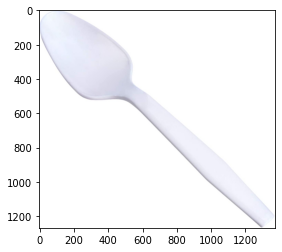

In [ ]:
plt.imshow(test_image)
plt.show()

In [ ]:
test_image = cv2.resize(test_image, image_dim)

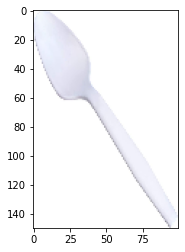

In [ ]:
plt.imshow(test_image)
plt.show()

In [ ]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

In [ ]:
test_image = test_image.flatten()

In [ ]:
test_image = test_image.reshape(1, -1)

In [ ]:
scaled_test_image = scaler.transform(test_image)
pca_test_image = pca.transform(scaled_test_image)

In [ ]:
svc.predict(pca_test_image)

array(['charging_cable'], dtype='<U20')

In [ ]:
rf.predict(pca_test_image)

array(['plastic_cup'], dtype='<U20')

In [ ]:
lgbm.predict(pca_test_image)

array(['plastic_cup'], dtype='<U20')

In [ ]:
test_image = cv2.imread("data/yakult_test.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

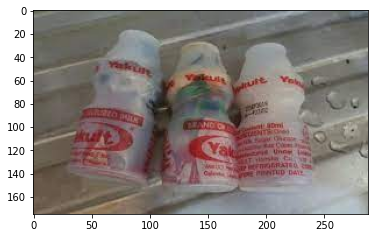

In [ ]:
plt.imshow(test_image)
plt.show()

In [ ]:
test_image = cv2.resize(test_image, image_dim)

In [ ]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

In [ ]:
test_image = test_image.flatten()

In [ ]:
test_image = test_image.reshape(1, -1)

In [ ]:
scaled_test_image = scaler.transform(test_image)
pca_test_image = pca.transform(scaled_test_image)

In [ ]:
svc.predict(pca_test_image)

array(['fruit_net'], dtype='<U20')

In [ ]:
rf.predict(pca_test_image)

array(['porcelain'], dtype='<U20')

In [ ]:
lgbm.predict(pca_test_image)

array(['paper_bag'], dtype='<U20')